## Hypothesis Testing

In [13]:
import pandas as pd
import sqlite3

from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt

#### Querying DB

In [19]:
con = sqlite3.connect("weather.db")

query ="""
SELECT
    "Pressure",
    "Wind Direction"
FROM more_features_data
"""

df_wind = pd.read_sql_query(query, con)
df_wind

,Pressure,Wind Direction
0,1016.9,SW
1,1016.8,W
2,1017.6,W
3,1017.8,W
4,1017.9,W
5,1019.6,NW
6,1020.6,NW
7,1021.4,NW
8,1029.4,SW
9,1029.0,SW


#### Concept Review (T-Tests, P-Values)

- T-Test represents how many Standard Deviations the means of the two groups (SW and NW Winds in this case) are apart
- P-Value indicates the likelihood that any observed difference in the means is random
    - If the P-Value is lower than 0.05, the difference between the groups is statistically significant.
        - Reject the null hypothesis
        - There is a significant difference between SW and NW winds
    - If the P-Value is greater than 0.05, the observed difference is likely random.
        - Do not reject the null hypothesis
        - There is no significant difference between SW and NW winds
- In our simple test, H0, the Null Hypothesis states that there is no significant difference between SW and NW winds



In [ ]:
SW_wind = df_wind[df_wind["Wind Direction"] == "SW"]["Pressure"]
NW_wind = df_wind[df_wind["Wind Direction"] == "NW"]["Pressure"]

t_stat, p_value = ttest_ind(SW_wind, NW_wind, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Wind Direction significantly affects Atmospheric Pressure")
else:
    print("Wind Direction has no significant effect on Atmospheric Pressure.")

T-statistic: 0.8509282194279264, P-value: 0.4298498104906374
No significant effect.


#### Conclusions

- T-Test is very low, the mean values for SW and NW winds don't seem to be far apart
- P-Value greater than 0.05 (~0.42985 > 0.05.).
    - There seems to be no Significant difference between SW wind and NW win.


#### Visual Representation of Pressure by Wind Direction

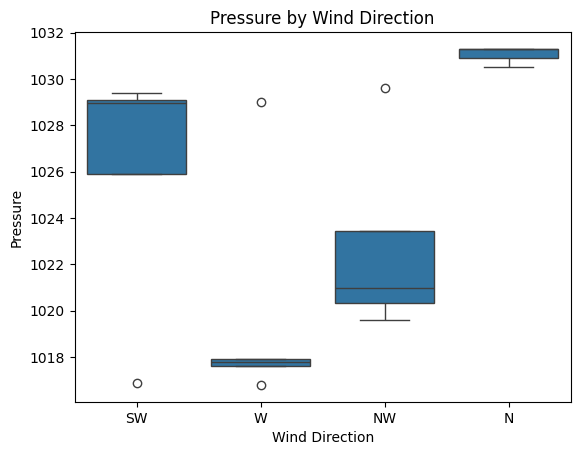

In [ ]:
sns.boxplot(x=df_wind["Wind Direction"], y=df_wind["Pressure"])
plt.title("Pressure by Wind Direction")
plt.show()